
# Automagic AGOX Analysis
This is an automatically generated AGOX analysis notebook.
 
Notebook generation is defined in this file: /home/machri/PythonPackages/agox-v2/agox/cli/cli_notebook.py
    

In [1]:
import ipywidgets as widgets
import numpy as np

from agox.utils.batch_analysis import Analysis
from agox.utils.jupyter_interactive import (
    InteractiveEnergy,
    InteractiveStructureHistogram,
    InteractiveSuccessStats,
    sorted_species,
)

## Scan and read db-files in the directories and calculate CDF.
This is the block that takes the most times, avoid rerunning unless changes have been made that require re-reading the 
directories, such as adding additional ones. 

In [4]:
%cd /home/machri/PythonPackages/agox-v2/agox/test/run_tests/tests_bh/test

/home/machri/PythonPackages/agox-v2/agox/test/run_tests/tests_bh/test


/home/machri/envs/agox-chgnet/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
analysis = Analysis()
force_reload = False
analysis.add_directory("dbs/", force_reload=force_reload)
analysis.compile_information()
analysis.calculate_CDF()

Loading files from directory: dbs/
Using dE of 0.0500 eV pr. atom (40 atoms)



## Analysis
    

In [ ]:
ISS = InteractiveSuccessStats(analysis)
out = widgets.interactive_output(ISS.update_plot, ISS.widget_dict)
widgets.HBox([widgets.VBox(ISS.widget_list), out])

In [ ]:
IE = InteractiveEnergy(analysis)
out = widgets.interactive_output(IE.update_plot, IE.widget_dict)
widgets.HBox([widgets.VBox(IE.widget_list), out])

interactive(children=(IntSlider(value=0, description='Index', max=0), Output()), _dom_classes=('widget-interac…

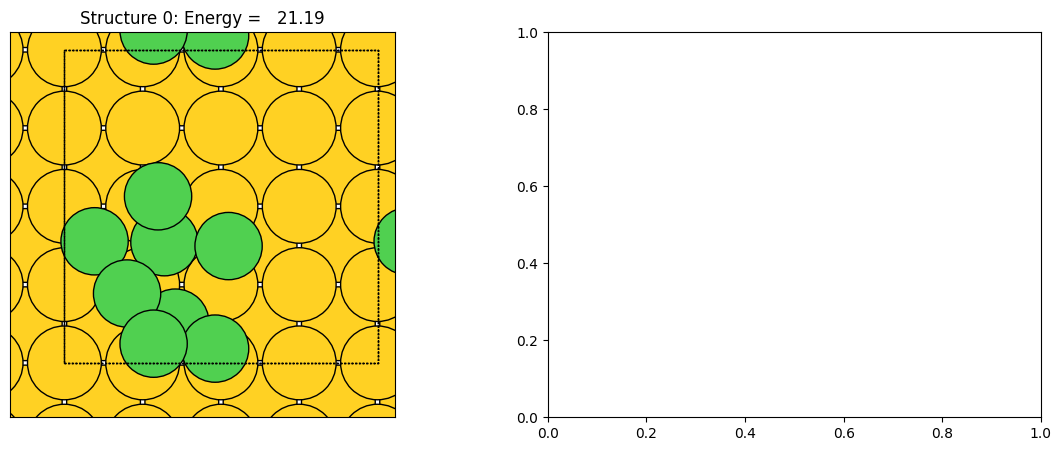

In [6]:
ISH = InteractiveStructureHistogram(analysis)
num_structures = np.sum(analysis.restarts)
index = widgets.IntSlider(min=0, max=num_structures - 1, value=0, description="Index")
widgets.interactive(ISH.update_plot, index=index)

In [ ]:
from ase.visualize import view

structures, energies = analysis.get_best_structures()
structures = [sorted_species(atoms) for atoms in structures]
view(structures, viewer="ngl")